In [8]:
# Load libraries
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn import model_selection
import matplotlib.pyplot as plt
import seaborn as sns
from string import ascii_letters
import scipy.stats
import numpy as np
import pandas as pd
import sklearn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV,LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
%matplotlib inline

In [34]:
#Importing Data
chemistries_discovery=pd.DataFrame.from_csv('chemistries_git.csv')
chemistries_discovery.index=chemistries_discovery.index.astype('float64')
print (chemistries_discovery.shape)
second_genome=pd.DataFrame.from_csv('second_genome_2.csv')
second_genome.index=second_genome.index.astype('float64')
print (second_genome.shape)
discovery_mets=pd.DataFrame.from_csv('data_discovery.csv')
discovery_mets.index=discovery_mets.index.astype('float64')
print (discovery_mets.shape)

(399, 78)
(540, 667)
(399, 663)


(399, 659)
Axes(0.125,0.125;0.775x0.775)


,root.metabolite.scaled.amino_acid.alanine_and_aspartate_metabolism.N-acetylalanine:scaled,root.metabolite.scaled.amino_acid.alanine_and_aspartate_metabolism.N-acetylaspartate (NAA):scaled,root.metabolite.scaled.amino_acid.alanine_and_aspartate_metabolism.alanine:scaled,root.metabolite.scaled.amino_acid.alanine_and_aspartate_metabolism.asparagine:scaled,root.metabolite.scaled.amino_acid.alanine_and_aspartate_metabolism.aspartate:scaled,root.metabolite.scaled.amino_acid.creatine_metabolism.creatine:scaled,root.metabolite.scaled.amino_acid.creatine_metabolism.creatinine:scaled,root.metabolite.scaled.amino_acid.creatine_metabolism.guanidinoacetate:scaled,root.metabolite.scaled.amino_acid.glutamate_metabolism.N-acetylglutamate:scaled,root.metabolite.scaled.amino_acid.glutamate_metabolism.N-acetylglutamine:scaled,...,root.metabolite.scaled.xenobiotics.xanthine_metabolism.1-methylxanthine:scaled,"root.metabolite.scaled.xenobiotics.xanthine_metabolism.3,7-dimethylurate:scaled",root.metabolite.scaled.xenobiotics.xanthine_metabolism.3-methylxanthine:scaled,root.metabolite.scaled.xenobiotics.xanthine_metabolism.5-acetylamino-6-amino-3-methyluracil:scaled,root.metabolite.scaled.xenobiotics.xanthine_metabolism.5-acetylamino-6-formylamino-3-methyluracil:scaled,root.metabolite.scaled.xenobiotics.xanthine_metabolism.7-methylxanthine:scaled,root.metabolite.scaled.xenobiotics.xanthine_metabolism.caffeine:scaled,root.metabolite.scaled.xenobiotics.xanthine_metabolism.paraxanthine:scaled,root.metabolite.scaled.xenobiotics.xanthine_metabolism.theobromine:scaled,root.metabolite.scaled.xenobiotics.xanthine_metabolism.theophylline:scaled
0,0.833218,0.761784,0.843610,1.256685,-0.162537,0.923467,-0.144530,0.766014,1.632376,0.645173,...,1.558918,-0.341156,0.394720,1.437934,0.834019,0.476340,-0.209969,0.796869,-0.213886,0.682462
1,0.304530,-0.108953,-1.244047,-0.869363,0.001267,-0.688200,0.491214,-0.494130,0.309377,0.593595,...,-1.046633,0.964223,0.666760,0.249349,0.056610,1.121009,-1.838136,-0.810097,0.298179,-0.803747
2,0.369553,1.268356,-0.266620,1.645854,-0.768815,0.277064,0.048680,0.076867,-0.578170,0.070755,...,-2.461265,0.533472,0.782458,-1.871884,-1.021436,0.456812,-0.818074,-2.424611,1.198634,-1.098684
3,-0.752913,0.157074,0.119658,-1.796677,0.729422,0.383756,-0.908895,-2.846540,-0.838363,0.061962,...,0.212080,-0.466614,-0.240078,0.255472,0.154972,-0.507446,0.523786,0.160878,-3.479483,0.288964
4,-0.648394,-0.428250,-1.908256,-0.321339,0.069634,-0.053452,0.035033,-2.197490,-1.941953,-1.525577,...,-0.287845,-2.280471,-1.154523,-0.786325,-0.509408,-1.595787,-1.163865,-0.807561,-1.194126,-0.642469


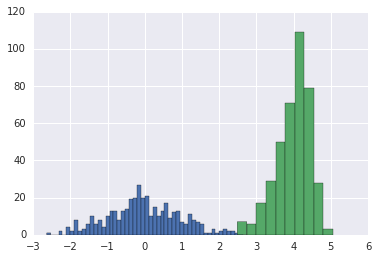

In [36]:
regression_analysis=discovery_mets.drop(['sex','PD_whole_tree','chao1'],1)
#Scale and standardize metabolites
X = regression_analysis.loc[:,regression_analysis.columns!='shannon']
y = (regression_analysis['shannon'])
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
Xcolumns=X.columns
Xindex=regression_analysis.index
X = scaler.fit_transform(X)
X=pd.DataFrame(data=X,columns=Xcolumns)
print (X.shape)
sns.set(font_scale=1.00)
print (X['root.metabolite.scaled.lipid.steroid.5alpha-androstan-3beta,17alpha-diol disulfate:scaled'].hist(bins=50))
plt.hist(y)
X.head()

In [9]:
## run cross_val_score on ridge and lasso to get out-of-sample R2 scores across 10-CV
alphas = np.linspace(1,1000,200)
lassocv=LassoCV(eps=0.175, n_alphas=200, alphas=None, fit_intercept=True, normalize=False, precompute='auto', cv=10)
ridgecv=RidgeCV(alphas=alphas,fit_intercept=True,normalize=False,cv=10)
discovery_score=cross_val_score(lassocv,X,y,cv=10)
print ('mean out-of-sample R2 LASSO',np.mean(discovery_score))
discovery_score_ridge=cross_val_score(ridgecv,X,y,cv=10)
print ('mean out-of-sample R2 Ridge',np.mean(discovery_score_ridge))

mean out-of-sample R2 LASSO 0.44773547745248166


/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The def

mean out-of-sample R2 Ridge 0.35023574199846996


In [51]:
#Extracting Beta_coefficients and cross_val predictions
lassocv=LassoCV(eps=0.175, n_alphas=200, alphas=None, fit_intercept=True, normalize=False, precompute='auto', cv=10)
y=discovery_mets['shannon']
y=y.reset_index()
y.drop(['public_client_id'],1,inplace=True)
X_folds = np.array_split(X, 10)
y_folds = np.array_split(y, 10)
coefficients=pd.DataFrame(index=X.columns).astype('float64')
predictions=[]
alphas= list()
score= []
std=[]
for k in range(10):
    X_train = list(X_folds)
    X_test  = X_train.pop(k)
    X_train = np.concatenate(X_train)
    y_train = list(y_folds)
    y_test  = y_train.pop(k)
    y_test=[ x[0] for x in  list(y_test.values)]
    y_train = np.concatenate(y_train)
    lassocv.fit(X_train, y_train)
    predictions.append(lassocv.predict(X_test).flatten())
    coef=list(lassocv.coef_)
    coefficients[k]=coef
    alphas.append(lassocv.alpha_)
    score.append(r2_score(y_test,lassocv.predict(X_test)))
#The L1 penalty for each model
print (alphas)
predictions_lasso=[item for sublist in predictions for item in sublist]
#Checking r2 score and pearson r
print (np.mean(score))
print (np.std(score))
print ('S.E.M',np.std(score)/np.sqrt(10))
print (scipy.stats.pearsonr(discovery_mets['shannon'],predictions_lasso))

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

[0.039961541031946914, 0.04012354796331661, 0.038168395402216365, 0.041451457326540785, 0.03903085906919329, 0.03956689974099288, 0.0449161949755424, 0.03867589675958929, 0.03995461545690002, 0.041599615043147055]
0.44773547745248166
0.10613472897414768
S.E.M 0.03356274824029728
(0.6834440092504868, 3.2077766743029246e-56)


/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['Arial'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


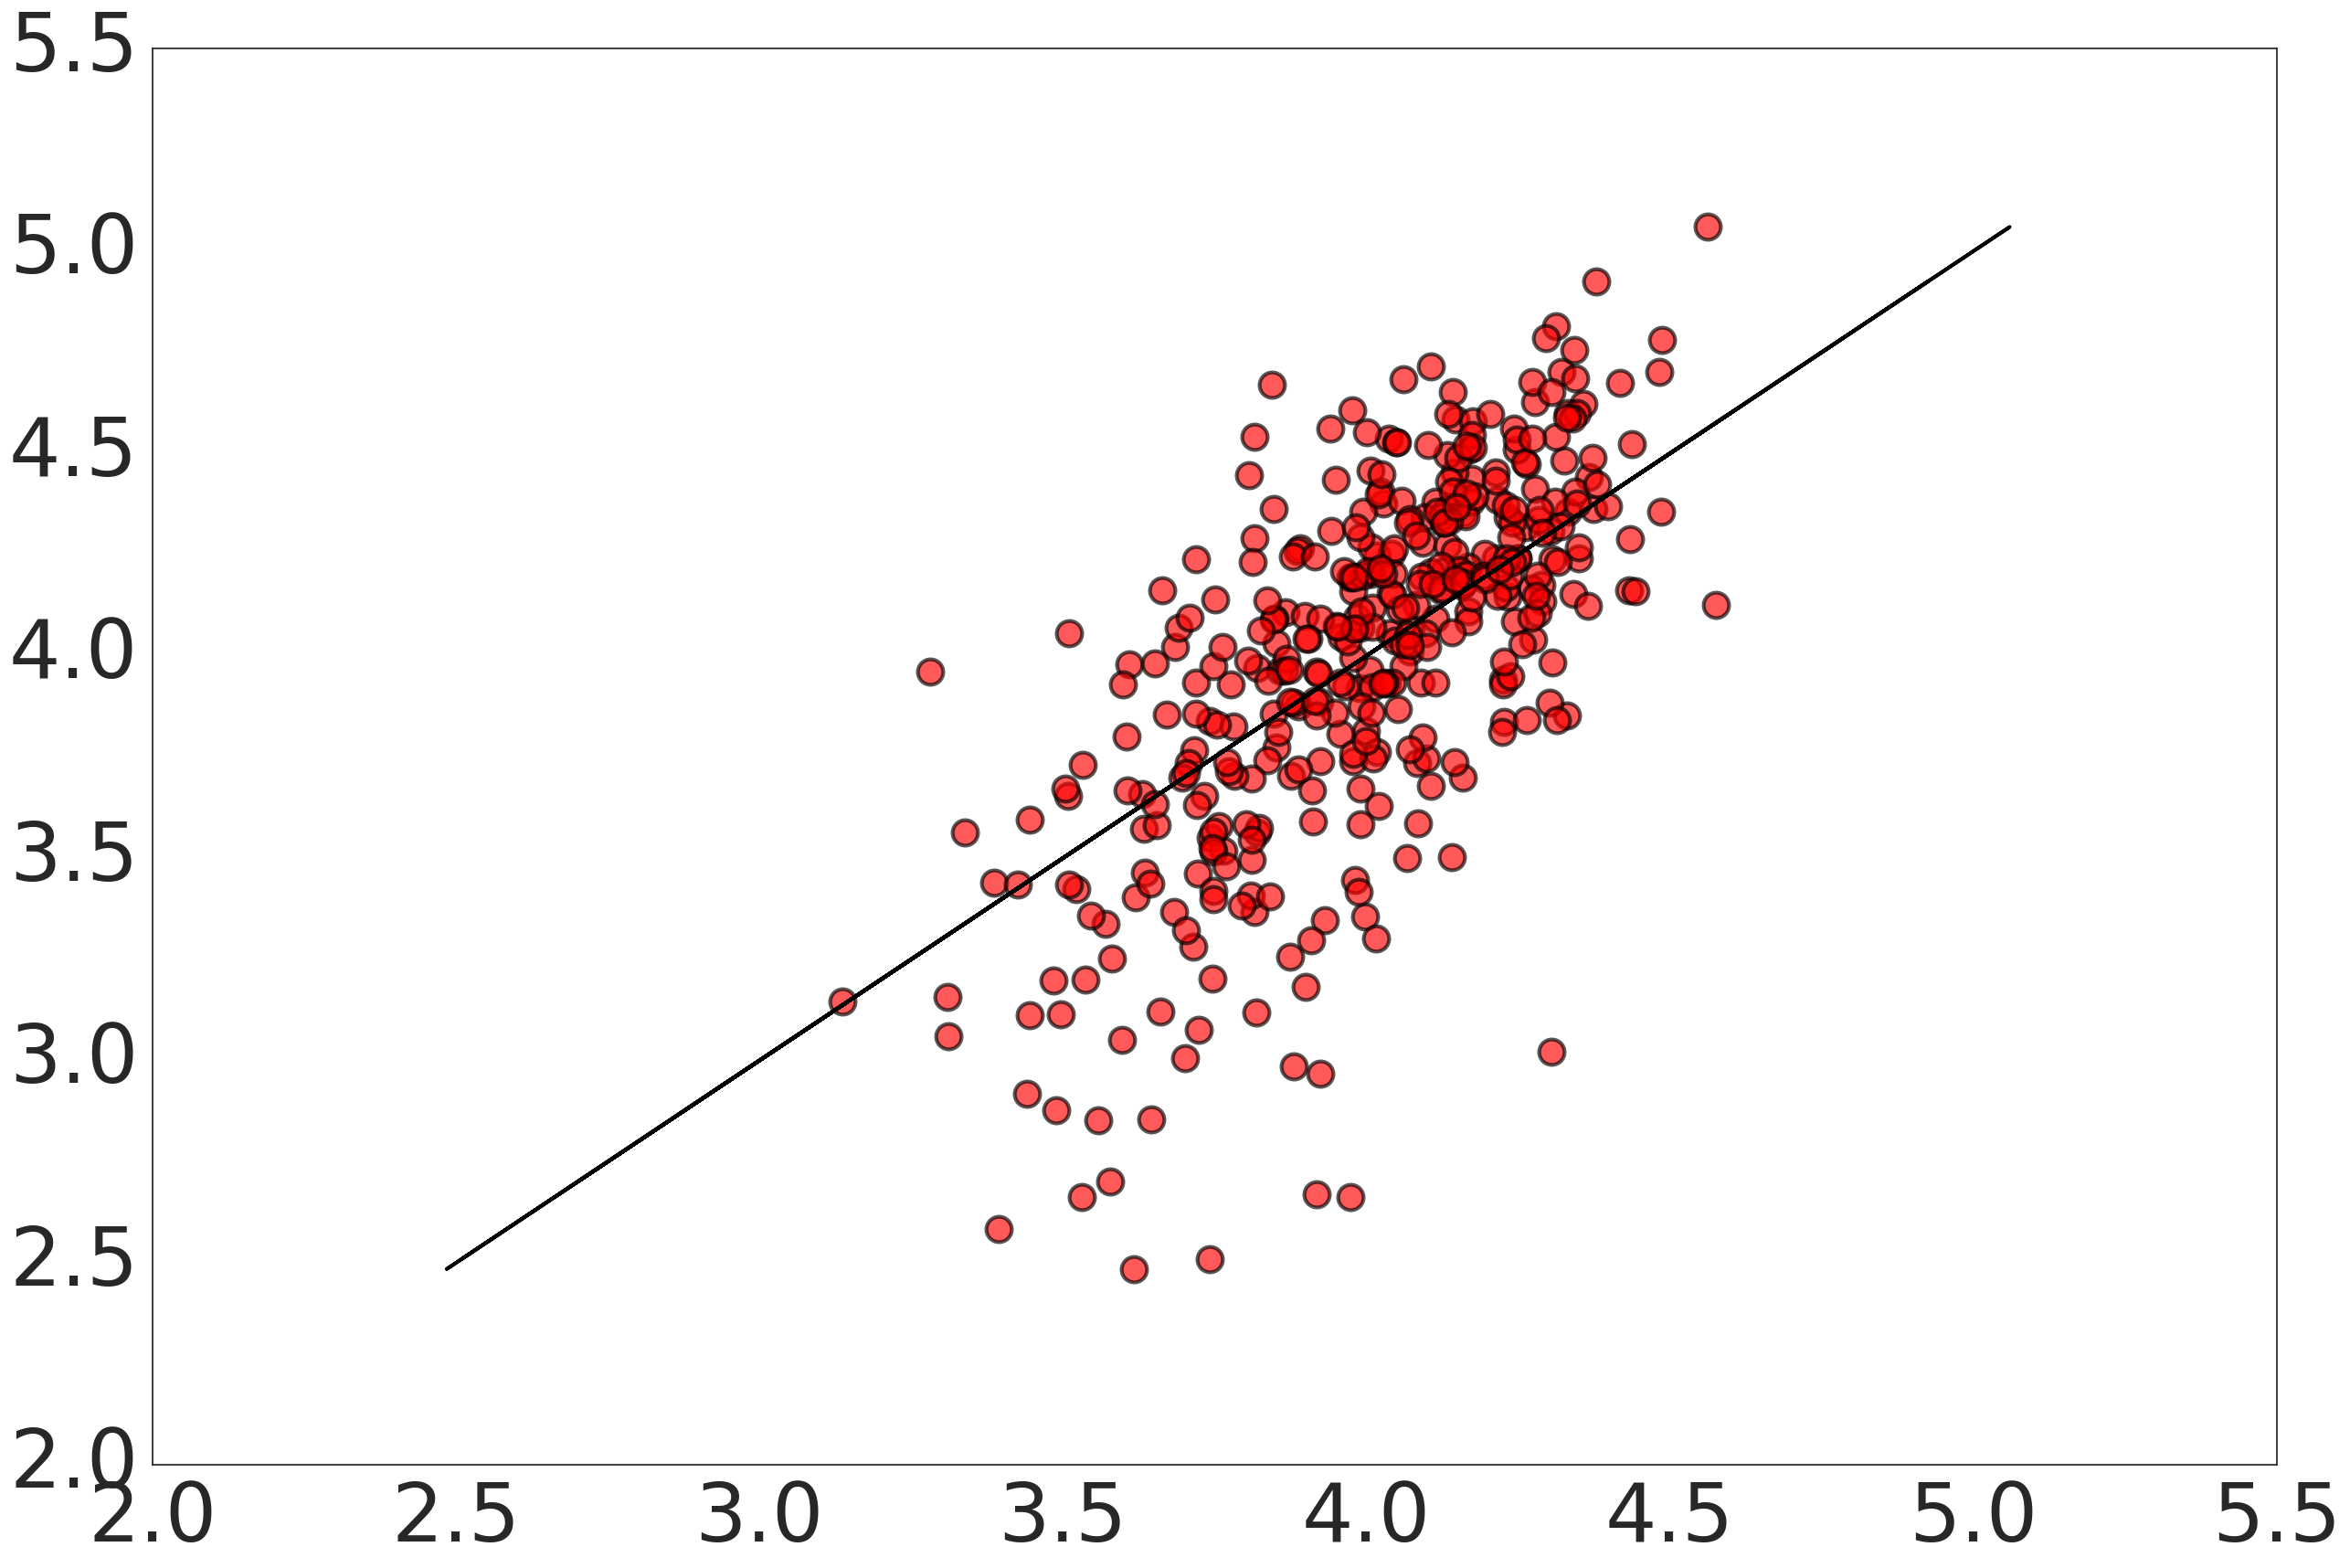

In [13]:
#Plotting predicted versus observed Fig. 1A
sns.set(font_scale=4.00,context='poster',font='Arial',style='white')
plt.figure(figsize=[30,20], dpi=100)
plt.scatter(predictions_lasso, discovery_mets['shannon'],s=400,color='r',alpha=0.65,linewidth=3,edgecolors='black')
from statsmodels.nonparametric.smoothers_lowess import lowess
plt.plot(y,y,color='black')
#plt.xlim(2,5.5)

In [52]:
#Identifying all metabolites with non-zero Beta Coefficients for figures 1B&C
for x in coefficients.index.tolist():
    if (coefficients.loc[x] == 0.0).sum()==10:
        coefficients.drop([x],inplace=True)
print (coefficients.shape)
means=[]
std=[]
zeroes=[]
for x in coefficients.index.tolist():
    means.append((np.mean(coefficients.loc[x])))
    std.append((np.std(coefficients.loc[x])))
    zeroes.append((coefficients.loc[x] == 0.0).astype(int).sum())
coefficients['mean']=means
coefficients['std_dev']=std
coefficients['zeroes']=zeroes
#save table as csv
coefficients[coefficients['zeroes']==0].to_csv('_40_coefs.csv')
coefficients.sort_values(by='mean',ascending=False).head()

(40, 10)


,0,1,2,3,4,5,6,7,8,9,mean,std_dev,zeroes
"root.metabolite.scaled.lipid.steroid.5alpha-androstan-3beta,17alpha-diol disulfate:scaled",0.066463,0.071688,0.075548,0.079401,0.086062,0.074617,0.079345,0.086107,0.080450,0.085282,0.078496,0.006176,0
root.metabolite.scaled.xenobiotics.benzoate_metabolism.hippurate:scaled,0.075347,0.058071,0.061615,0.059721,0.062048,0.061329,0.058928,0.060168,0.040132,0.037057,0.057441,0.010511,0
root.metabolite.scaled.xenobiotics.food_component_plant.cinnamoylglycine:scaled,0.047287,0.056804,0.021443,0.060724,0.050004,0.052995,0.086802,0.047123,0.069107,0.073827,0.056612,0.016886,0
root.metabolite.scaled.amino_acid.phenylalanine_and_tyrosine_metabolism.p-cresol sulfate:scaled,0.058071,0.066334,0.062401,0.050803,0.049018,0.056246,0.022637,0.050644,0.049763,0.050510,0.051643,0.011175,0
root.metabolite.scaled.xenobiotics.food_component_plant.methyl glucopyranoside (alpha + beta):scaled,0.020713,0.028351,0.036733,0.032002,0.023007,0.021079,0.025953,0.031032,0.034010,0.025521,0.027840,0.005232,0


In [20]:
coefficients.shape

(40, 13)

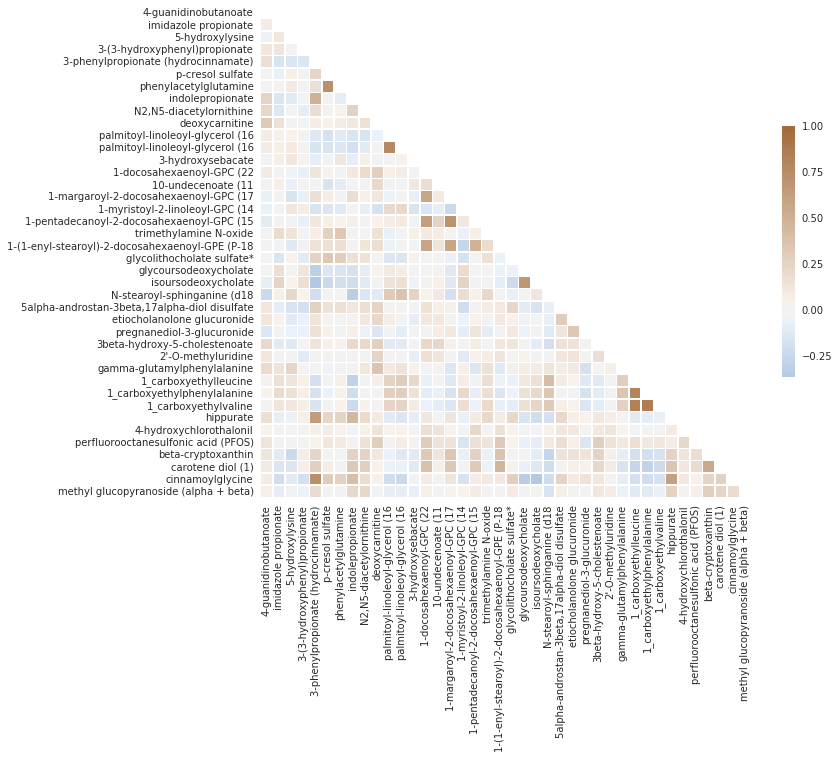

In [53]:
#Assessing collinearity, supplementary Figure 1
corr_df=pd.DataFrame(index=discovery_mets.index)
for x in coefficients.index.tolist():
    corr_df[x]=discovery_mets[x]
sns.set(font='Arial',style='white')
corr_df.columns=list([x.split(":")[0].split(".")[-1] for x in corr_df.columns.tolist()])
# Compute the correlation matrix
corr = corr_df.corr('pearson')
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(250, 40, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
heatmap=sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
heatmap
#plt.savefig('heatmap_40_.png',dpi=200)

In [37]:
#no. of corellations >0.80
r=corr.values.flatten()
#remove corelations of metabolites with themselves (r=1)
r = [x for x in r if x !=1]
#count number of correlations where absolute value of r>0.80
j=[]
j = [i for i in r if abs(i)>0.80]
print (len(j))

6


In [47]:
#Using all metabolites to predict PD whole tree and Chao1
lassocv=LassoCV(eps=0.175, n_alphas=200, alphas=None, fit_intercept=True, normalize=False, precompute='auto', cv=10)
discovery_PD_all=cross_val_score(lassocv,X,discovery_mets['PD_whole_tree'],cv=10)
print ('PD whole tree all 659 mets mean out-of-sample R2',np.mean(discovery_PD_all))
discovery_Chao_all=cross_val_score(lassocv,X,discovery_mets['chao1'],cv=10)
print ('Chao1 all 659 mets mean out-of-sample R2',np.mean(discovery_Chao_all))

PD whole tree all 659 mets mean out-of-sample R2 0.46595868693020304
Chao1 all 659 mets mean out-of-sample R2 0.3325510389113281


In [49]:
#Testing prediction of other diversity metrics using whole metabolome and just the 40 mets identified.
W=pd.DataFrame()
for x in discovery_mets.columns.tolist():
    if x in coefficients.index.tolist():
        W[x]=X[x]
print (W.shape)
lassocv=LassoCV(eps=0.01, n_alphas=200, alphas=None, fit_intercept=True, normalize=False, precompute='auto', cv=10)
discovery_PD_all=cross_val_score(lassocv,W,discovery_mets['PD_whole_tree'],cv=10)
print ('PD whole tree all 659 mets mean out-of-sample R2',np.mean(discovery_PD_all))
discovery_Chao_all=cross_val_score(lassocv,W,discovery_mets['chao1'],cv=10)
print ('Chao1 all 659 mets mean out-of-sample R2',np.mean(discovery_Chao_all))

(399, 40)
PD whole tree all 659 mets mean out-of-sample R2 0.4992750699044488
Chao1 all 659 mets mean out-of-sample R2 0.36160743908467713


(540, 659)
Axes(0.125,0.125;0.775x0.775)


/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,root.metabolite.scaled.amino_acid.alanine_and_aspartate_metabolism.N-acetylalanine:scaled,root.metabolite.scaled.amino_acid.alanine_and_aspartate_metabolism.N-acetylaspartate (NAA):scaled,root.metabolite.scaled.amino_acid.alanine_and_aspartate_metabolism.alanine:scaled,root.metabolite.scaled.amino_acid.alanine_and_aspartate_metabolism.asparagine:scaled,root.metabolite.scaled.amino_acid.alanine_and_aspartate_metabolism.aspartate:scaled,root.metabolite.scaled.amino_acid.creatine_metabolism.creatine:scaled,root.metabolite.scaled.amino_acid.creatine_metabolism.creatinine:scaled,root.metabolite.scaled.amino_acid.creatine_metabolism.guanidinoacetate:scaled,root.metabolite.scaled.amino_acid.glutamate_metabolism.N-acetylglutamate:scaled,root.metabolite.scaled.amino_acid.glutamate_metabolism.N-acetylglutamine:scaled,...,root.metabolite.scaled.xenobiotics.xanthine_metabolism.1-methylxanthine:scaled,"root.metabolite.scaled.xenobiotics.xanthine_metabolism.3,7-dimethylurate:scaled",root.metabolite.scaled.xenobiotics.xanthine_metabolism.3-methylxanthine:scaled,root.metabolite.scaled.xenobiotics.xanthine_metabolism.5-acetylamino-6-amino-3-methyluracil:scaled,root.metabolite.scaled.xenobiotics.xanthine_metabolism.5-acetylamino-6-formylamino-3-methyluracil:scaled,root.metabolite.scaled.xenobiotics.xanthine_metabolism.7-methylxanthine:scaled,root.metabolite.scaled.xenobiotics.xanthine_metabolism.caffeine:scaled,root.metabolite.scaled.xenobiotics.xanthine_metabolism.paraxanthine:scaled,root.metabolite.scaled.xenobiotics.xanthine_metabolism.theobromine:scaled,root.metabolite.scaled.xenobiotics.xanthine_metabolism.theophylline:scaled
0,-0.266437,0.071488,1.918660,1.216123,1.729567,1.585998,-0.633255,0.104518,0.906525,0.982696,...,0.757320,0.030732,0.680989,0.253858,-0.222475,0.623707,0.470987,-0.023013,0.242612,0.658531
1,0.247594,-1.129239,-0.950582,0.517312,0.626548,1.794388,0.099976,-0.317759,1.531326,-0.063245,...,-0.262805,-1.592078,0.329842,-2.219617,-2.920668,0.397105,-2.847151,-0.691564,-0.834543,-2.460315
2,-0.967459,0.759107,0.635581,-0.467539,1.508864,0.847410,-0.409362,-1.407568,-0.994566,-2.242597,...,-0.185448,-1.018736,-1.204944,-0.227725,-0.518339,-1.227035,0.628865,0.489888,-0.192473,0.177627
3,0.619455,0.756034,-0.432164,0.128723,0.445597,-0.466291,0.194305,0.104609,0.926462,0.335925,...,-0.062582,2.026007,1.225503,0.674133,1.370616,1.314605,0.093642,0.569995,1.513439,0.233532
4,0.619306,0.189571,-0.199480,0.421319,1.658821,-1.979968,1.664411,1.078514,0.356001,0.397532,...,0.169693,2.882071,1.936524,0.771476,0.968540,2.321120,0.375055,0.748576,2.270262,0.438937


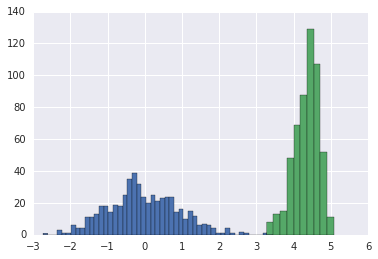

In [55]:
#Metabolomics Validation
#Scaling and standardizing the validation cohort
y_validation = (second_genome['shannon'])
vendor = second_genome.loc[:,second_genome.columns!='shannon']
vendor.drop(['BMI','vendor','sex','Age','PD_whole_tree','chao1','days'],1,inplace=True)
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
Xcolumns=vendor.columns
Xindex=vendor.index
vendor = scaler.fit_transform(vendor)
vendor=pd.DataFrame(data=vendor,columns=Xcolumns)
print (vendor.shape)
sns.set(font_scale=1.00)
print (vendor['root.metabolite.scaled.amino_acid.alanine_and_aspartate_metabolism.N-acetylalanine:scaled'].hist(bins=50))
plt.hist(y_validation)
vendor.head()

In [56]:
#Run LASSO using all 659 Mets
## run cross_val_score on ridge and lasso to get out-of-sample R2 scores across 10-CV
lassocv=LassoCV(eps=0.175, n_alphas=200, alphas=None, fit_intercept=True, normalize=False, precompute='auto', cv=10)
ridgecv=RidgeCV(alphas=alphas,fit_intercept=True,normalize=False,cv=10)
validation_score=cross_val_score(lassocv,vendor,y_validation,cv=10)
print ('mean out-of-sample R2 LASSO',np.mean(validation_score))

mean out-of-sample R2 LASSO 0.37799936077446383


In [58]:
#Predict shannon using just the 40 metabolites identified in the discovery cohort
for x in vendor.columns.tolist():
    if x not in coefficients.index.tolist():
        vendor.drop([x],1,inplace=True)
print (vendor.shape)
alphas = np.linspace(0.01,1000,200)
lassocv=LassoCV(eps=0.05, n_alphas=200, alphas=None, fit_intercept=True, normalize=False, precompute='auto', cv=10)
validation40_score=cross_val_score(lassocv,vendor,y_validation,cv=10)
print ('mean out-of-sample R2 LASSO 40 mets validation',np.mean(validation40_score))
print (np.std(validation40_score))

(540, 40)
mean out-of-sample R2 LASSO 40 mets validation 0.3425722058905879
0.07784909649313117


In [59]:
#Assessing whether performance is significantly different across the 10-CVs between whole metabolome model and
#the 40 metabolite model
print ('ttest difference',scipy.stats.ttest_ind(validation_score,validation40_score))

ttest difference Ttest_indResult(statistic=1.0558927573271486, pvalue=0.30498393598737583)


In [60]:
#Extracting Beta coefficients from 10-fold cv using only 40 mets in the validation set
lassocv=LassoCV(eps=0.05, n_alphas=200, alphas=None, fit_intercept=True, normalize=False, precompute='auto', cv=10)
y=y_validation
y=y.reset_index()
y.drop(['public_client_id'],1,inplace=True)
from sklearn.model_selection import KFold
X_folds = np.array_split(vendor, 10)
y_folds = np.array_split(y, 10)
coefficients_validation=pd.DataFrame(index=vendor.columns).astype('float64')
predictions_validation=[]
alphas= list()
score_validation= []
for k in range(10):
    X_train = list(X_folds)
    X_test  = X_train.pop(k)
    X_train = np.concatenate(X_train)
    y_train = list(y_folds)
    y_test  = y_train.pop(k)
    y_test=[ x[0] for x in  list(y_test.values)]
    y_train = np.concatenate(y_train)
    lassocv.fit(X_train, y_train)
    predictions_validation.append(lassocv.predict(X_test).flatten())
    coef=list(lassocv.coef_)
    coefficients_validation[k]=coef
    alphas.append(lassocv.alpha_)
    score_validation.append(r2_score(y_test,lassocv.predict(X_test)))
print (lassocv.alpha_)
print (alphas)
predictions_validation=[item for sublist in predictions_validation for item in sublist]
#Identifying all metabolites with non-zero Beta Coefficients
means=[]
std=[]
zeroes=[]
for x in coefficients_validation.index.tolist():
    means.append((np.mean(coefficients_validation.loc[x])))
    std.append((np.std(coefficients_validation.loc[x])))
    zeroes.append((coefficients_validation.loc[x] == 0).astype(int).sum())
coefficients_validation['mean']=means
coefficients_validation['std_dev']=std
coefficients_validation['zeroes']=zeroes
coefficients_validation.sort_values(by='mean')
coefficients_validation.to_csv('coeff_validation.csv')

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

0.006481230778656312
[0.008129124361579266, 0.006676462334191416, 0.006490687317870491, 0.0067549541501457765, 0.006788824190485651, 0.006717885227298037, 0.006905487094547851, 0.006776899721933358, 0.006981219855903212, 0.006481230778656312]


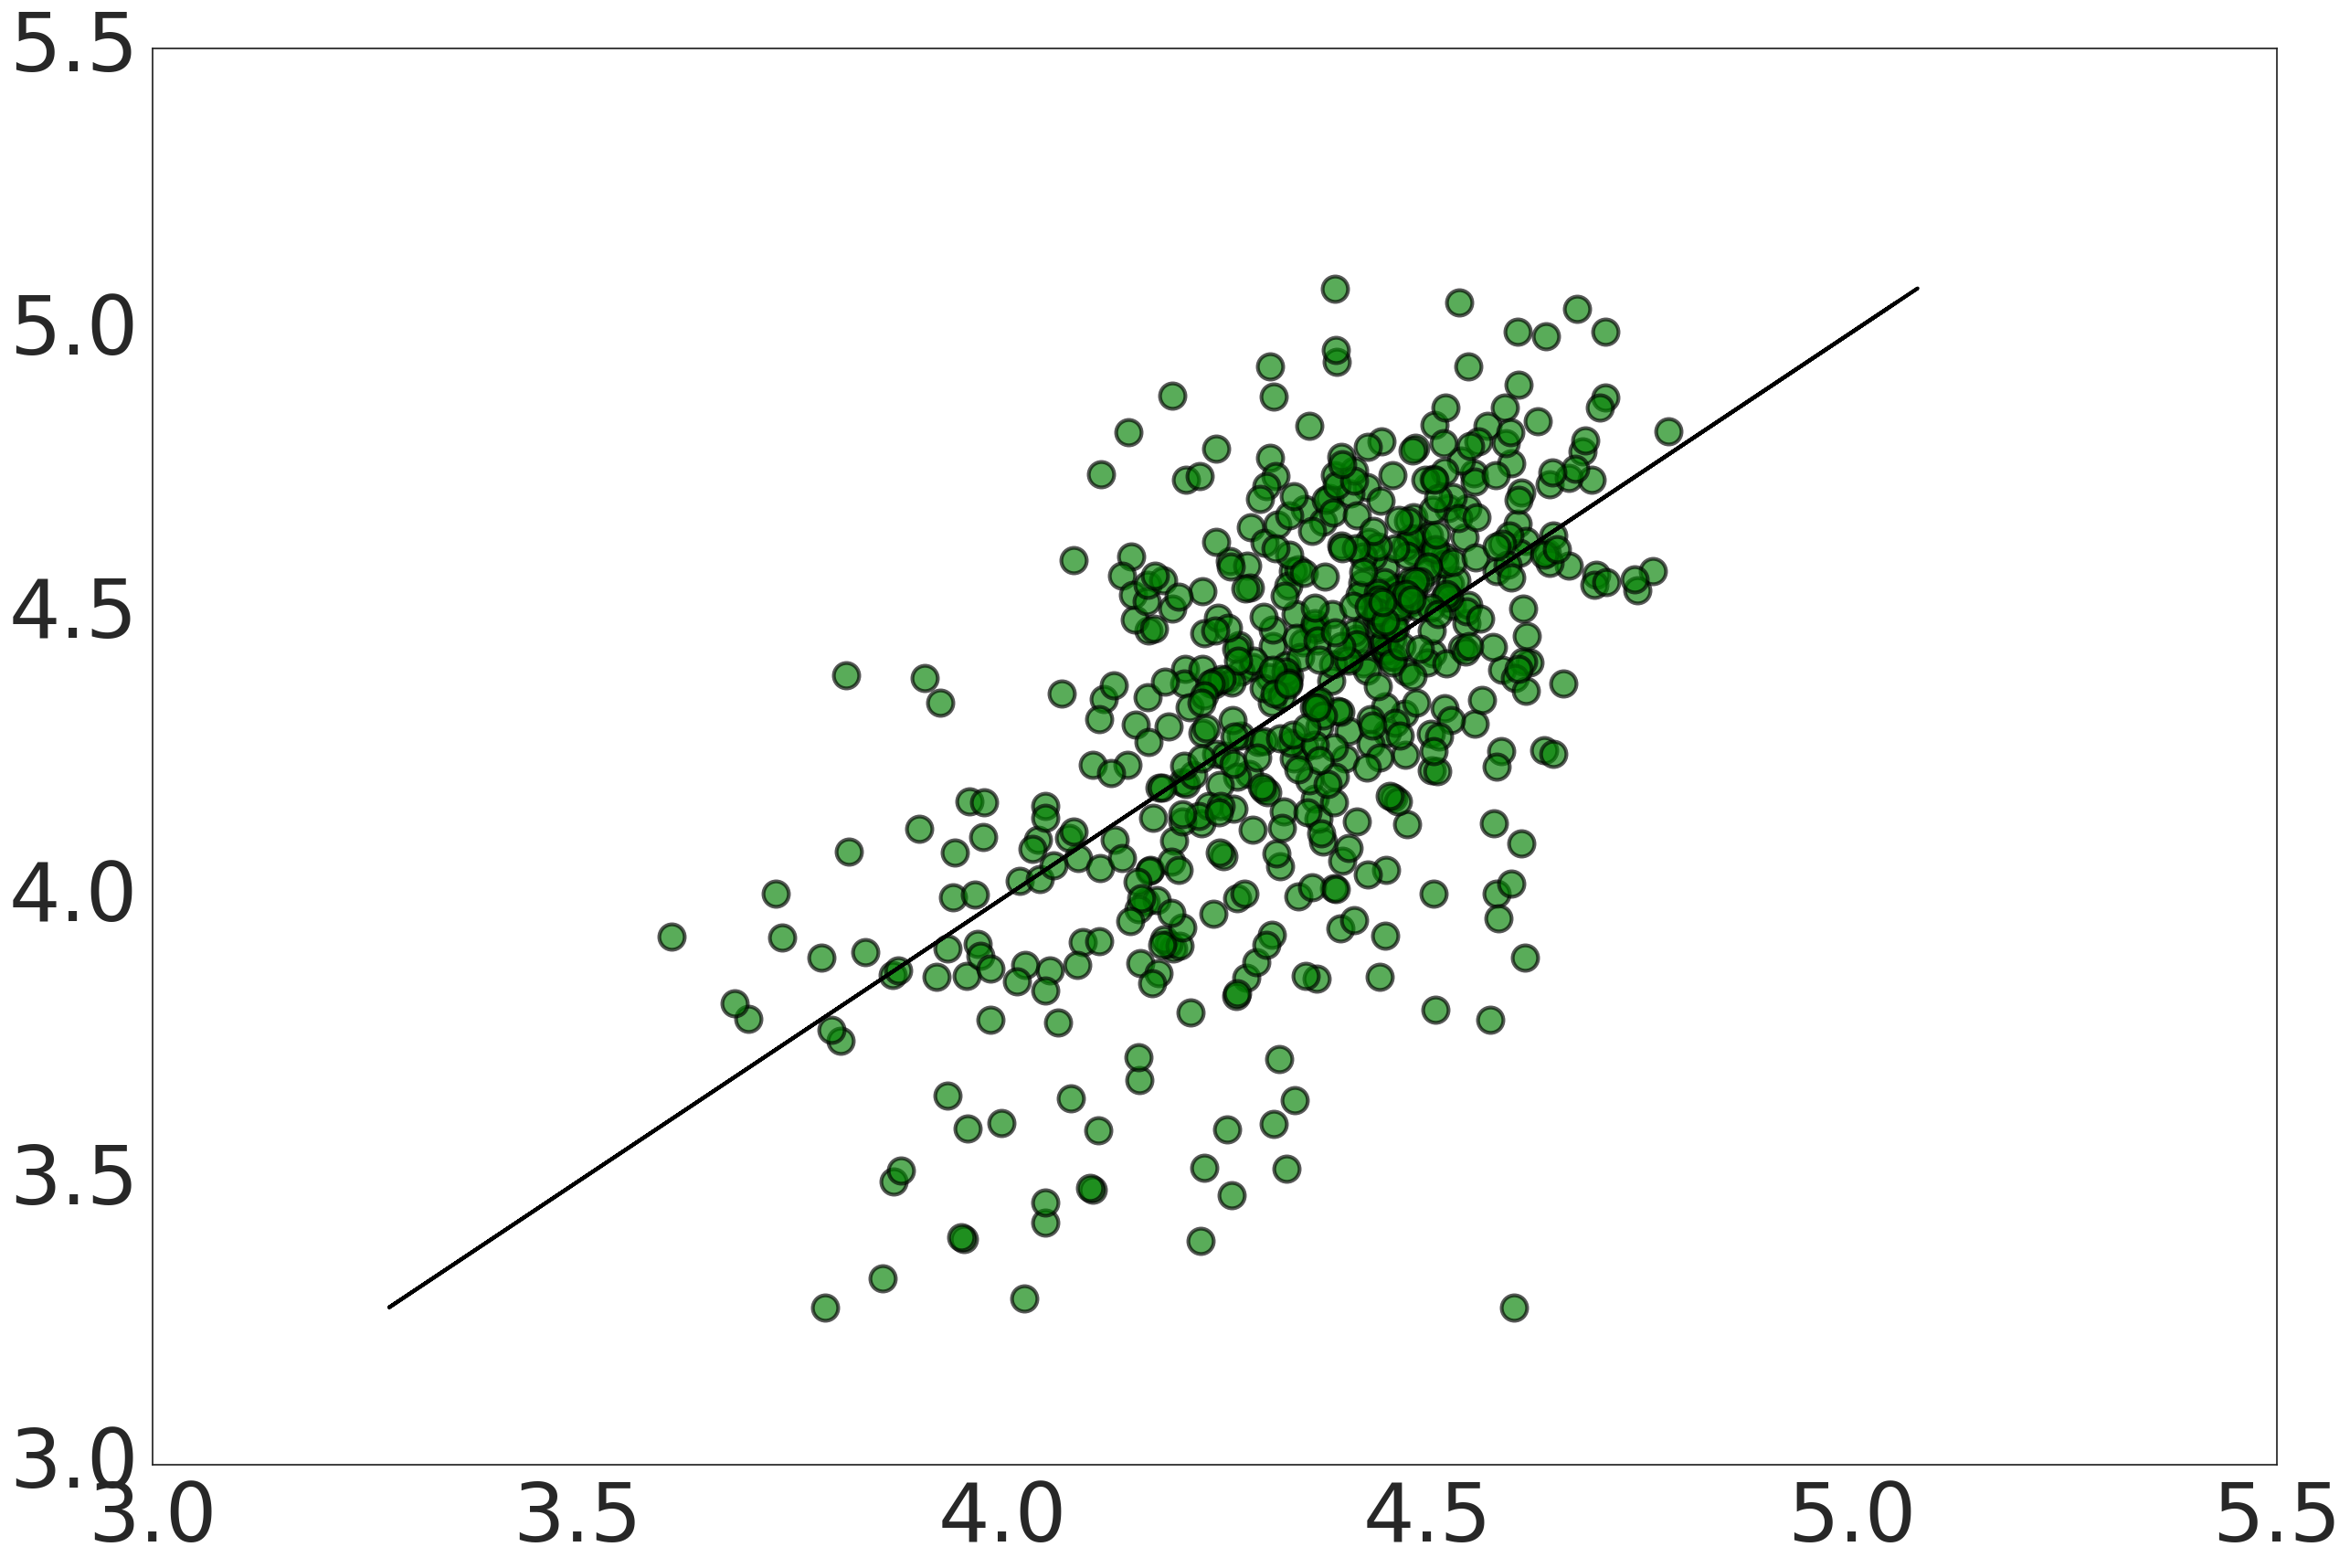

In [64]:
#Plotting predicted versus observed Fig. 6A
sns.set(font_scale=4.00,context='poster',font='Arial',style='white')
plt.figure(figsize=[30,20], dpi=100)
plt.scatter(predictions_validation, second_genome['shannon'],s=400,color='g',alpha=0.65,linewidth=3,edgecolors='black')
from statsmodels.nonparametric.smoothers_lowess import lowess
plt.plot(y,y,color='black')
#plt.xlim(2,5.5)

spearman rho= SpearmanrResult(correlation=0.9, pvalue=0.00015997142806871369)
Pearson R= (0.9374199588043086, 2.0511612367360166e-05)


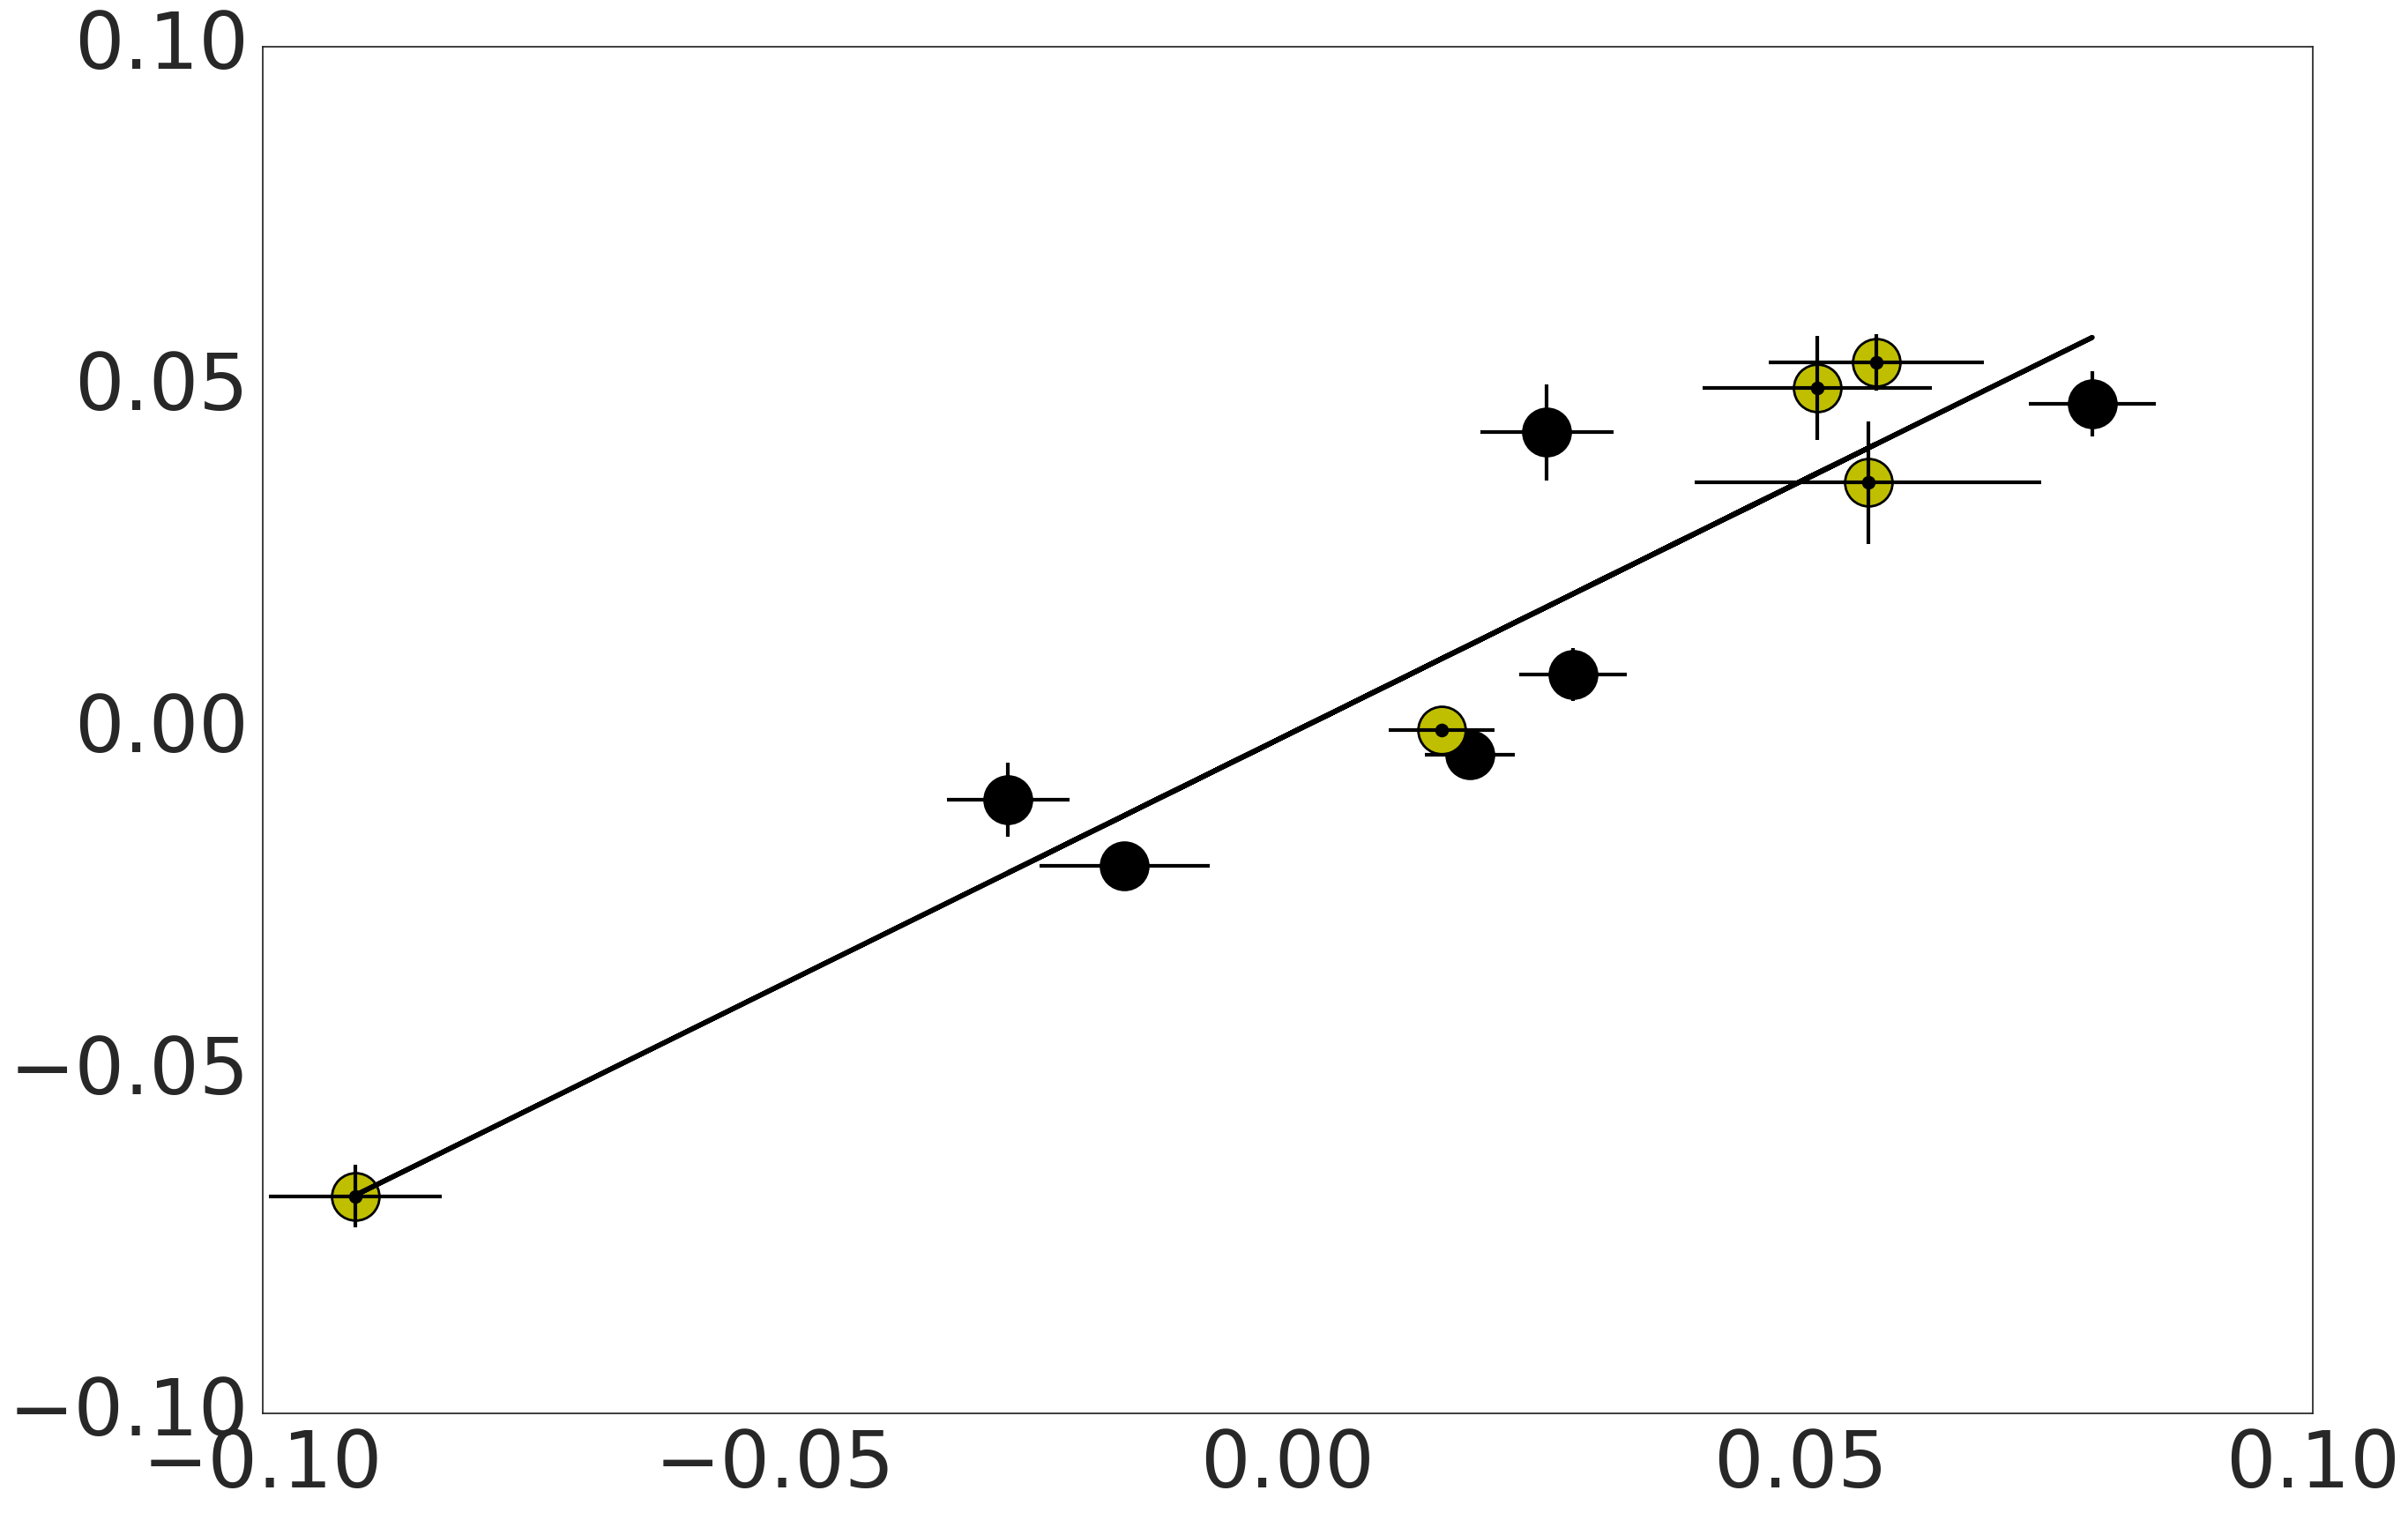

In [62]:
#comparing beta coefficients across discovery and validation sets (Figure 6B)
top_11_=coefficients[coefficients['zeroes']==0].index.tolist()
correlating_coef=pd.DataFrame(index=top_11_)
correlating_coef['mean_discovery']=coefficients['mean']
correlating_coef['mean_validation']=coefficients_validation['mean']
correlating_coef['std_validation']=coefficients_validation['std_dev']
correlating_coef['std_discovery']=coefficients['std_dev']
sns.set(font_scale=4.00,context='poster',font='Arial',style='white')
plt.figure(figsize=[30,20], dpi=100)
comets=['root.metabolite.scaled.lipid.secondary_bile_acid_metabolism.isoursodeoxycholate:scaled','root.metabolite.scaled.xenobiotics.benzoate_metabolism.hippurate:scaled',
       'root.metabolite.scaled.xenobiotics.food_component_plant.cinnamoylglycine:scaled','root.metabolite.scaled.amino_acid.phenylalanine_and_tyrosine_metabolism.p-cresol sulfate:scaled',
       'root.metabolite.scaled.lipid.secondary_bile_acid_metabolism.glycolithocholate sulfate*:scaled']
hue=[]
for x in correlating_coef.index.tolist():
    if x in comets:
        hue.append(1)
    else:
        hue.append(0)
correlating_coef['hue']=hue
plt.figure(figsize=[30,20], dpi=100)
disc=correlating_coef['std_discovery'].tolist()
val=correlating_coef['std_validation'].tolist()
not_comets=correlating_coef[correlating_coef['hue']==0]
comets=correlating_coef[correlating_coef['hue']==1]
plt.errorbar(correlating_coef['mean_discovery'],correlating_coef['mean_validation'], xerr=disc, yerr=val,fmt='o',color='k',linewidth=3)
plt.scatter(not_comets['mean_discovery'], not_comets['mean_validation'],s=1500,color='k',linewidth=2,alpha=1,edgecolors='black')
plt.scatter(comets['mean_discovery'], comets['mean_validation'],s=1500,color='y',linewidth=2,alpha=1,edgecolors='k')
plt.plot(correlating_coef['mean_discovery'], np.poly1d(np.polyfit(correlating_coef['mean_discovery'],correlating_coef['mean_validation'], 1))(correlating_coef['mean_discovery']),color='k',linewidth=4)
plt.xlim(-.10,.10)
plt.ylim(-.10,.10)
spearman=scipy.stats.spearmanr(correlating_coef['mean_discovery'],correlating_coef['mean_validation'])
print ('spearman rho=',spearman)
pearson=scipy.stats.pearsonr(correlating_coef['mean_discovery'],correlating_coef['mean_validation'])
print ('Pearson R=',pearson)